# Lab 7 - More Loops and Conditional Statements
- **Author:** Deana Baron
- **Date:** 3/26/19

## Question 2 - Import Necessary Python Packages (3 pts)

In the questions below, you will be working with `numpy arrays`, and `pandas dataframes`.

You will also be downloading files using `urllib.request`, accessing directories and files on your computer using `os`, and retrieving filenames using `glob.` Last, you will also be creating plots of your data using `matplotlib.pyplot`.

Import all of the necessary Python packages to accomplish these tasks.

In [2]:
# import necessary Python libraries
import os
from glob import glob
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# print success statement
print("Libraries were successfully imported!")

Libraries were successfully imported!


## Question 3 - Set current working directory (5pts)
use os.chdir() to set current working directory.
use os.getcwd() to check current workign directory

In [3]:
# set the current working directory
os.chdir('C:\\Users\\dbaron\\Documents')

# check the current working directory after setting it
os.getcwd()

'C:\\Users\\dbaron\\Documents'

## Question 4 - Download FLX*.csv files into /data subdirectory (10pts)

Use `urllib.request` to download the flux data for Harvard Forest and Hyytiala, Finland to your data directory. The location of the data is 
- http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/FLX_FI-Hyy_FLUXNET2015_SUBSET_YY_1996-2014_1-3.csv
- http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/FLX_US-Ha1_FLUXNET2015_SUBSET_YY_1991-2012_1-3.csv

* More information about the Harvard Forest site can be found<a href="http://sites.fluxdata.org/US-Ha1/" target="_blank"> here 
* More information about the Hyytiala site can be found<a href="http://sites.fluxdata.org/FI-Hyy/" target="_blank"> here

In [4]:
# download the necessary csv files needed for this lab from the Internet

# download the csv for the Hyytiala dataset
urllib.request.urlretrieve(
    url = "http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/FLX_FI-Hyy_FLUXNET2015_SUBSET_YY_1996-2014_1-3.csv",                  
    filename = "data/FLX_FI-Hyy_FLUXNET2015_SUBSET_YY_1996-2014_1-3.csv"
)

# download the csv for the Harvard Forest
urllib.request.urlretrieve(
    url = "http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/FLX_US-Ha1_FLUXNET2015_SUBSET_YY_1991-2012_1-3.csv",                  
    filename = "data/FLX_US-Ha1_FLUXNET2015_SUBSET_YY_1991-2012_1-3.csv"
)

# print statement to show successful data download
print("Data is successfully downloaded!")

Data is successfully downloaded!


## Question 5: Use Glob To Create Lists of Filenames (10 pts)
1. Change working directory to data and  create a list of all files containting keywork "FLX" in your working directory 
2. Print these lists of filenames.

In [5]:
# change the current working directory to the `data` subfolder
os.chdir('C:\\Users\\dbaron\\Documents\\data')

# create a print a list of all the filenames that contain "flx" using glob
filelist = glob("*FLX*")
print(filelist)

['FLX_FI-Hyy_FLUXNET2015_SUBSET_YY_1996-2014_1-3.csv', 'FLX_US-Ha1_FLUXNET2015_SUBSET_YY_1991-2012_1-3.csv']


# Use a loop to do Questions 6-10

## Question 6: Import CSV Files Into Pandas Dataframes (10 pts)

1. Import each csv file into a new pandas dataframe.
2. Print your pandas dataframes. Notice the structures of your csv pandas dataframes.

## Question 7 -  Create the column lists of dataframes (10pts)

## Question 8 - Create new columnlists including the following columns  (10pts)

* NEE_VUT_REF, but not NEE_VUT_REF_QC  not  NEE_VUT_REF_RANDUNC
* GPP_NT_VUT_REF
* RECO_NT_VUT_RE

## Question 9: Summarize the statistics of the new columnlist  (10 pts)

## Question 10:  Plot time series of GPP, NEE and RE for for both sites  (15 pts)
1. Plot the annual GPP, RE and NEE for Harvard Forest in three subplots, their units are  gC m-2 y-1),  
2. overplot the difference of RE and GPP (RE-GPP) on the NEE subplot. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 90 columns):
TIMESTAMP              19 non-null int64
TA_F                   19 non-null float64
TA_F_QC                19 non-null float64
SW_IN_F                19 non-null float64
SW_IN_F_QC             19 non-null float64
LW_IN_F                19 non-null float64
LW_IN_F_QC             19 non-null float64
VPD_F                  19 non-null float64
VPD_F_QC               19 non-null float64
PA_F                   19 non-null float64
PA_F_QC                19 non-null float64
P_F                    19 non-null float64
P_F_QC                 19 non-null float64
WS_F                   19 non-null float64
WS_F_QC                19 non-null float64
USTAR                  19 non-null float64
USTAR_QC               19 non-null float64
NETRAD                 19 non-null float64
NETRAD_QC              19 non-null float64
PPFD_IN                19 non-null float64
PPFD_IN_QC             19 non-null floa

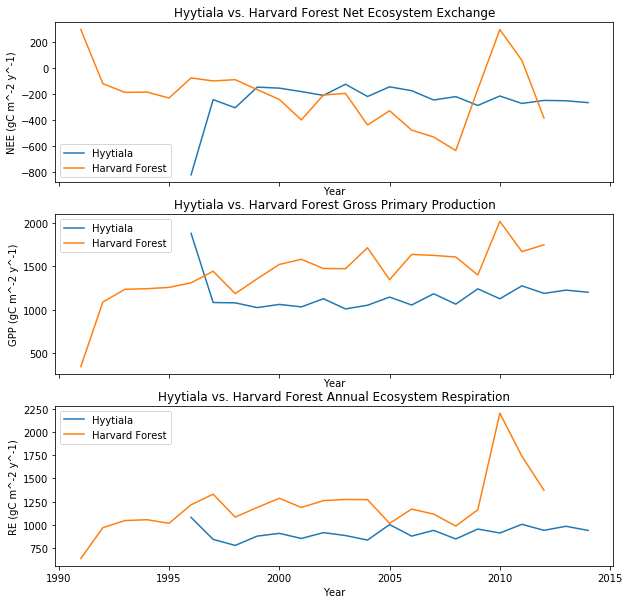

In [6]:
# load all csv files in directory
files = glob("*.csv")

# set parameters for the figure for the overplotting
plt.rcParams["figure.figsize"] = (10, 10)
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
ax1.set(xlabel="Year", ylabel="NEE (gC m^-2 y^-1)");
ax2.set(xlabel="Year", ylabel="GPP (gC m^-2 y^-1)");
ax3.set(xlabel="Year", ylabel="RE (gC m^-2 y^-1)");

# loop to convert and plot NEE, GPP, and RE
for file in files:
    df = pd.read_csv(file, delimiter=",") # read into pandas dataframe
    print(file, "\n", df.info(), "\n")
    
    columnlist = list(df) # create column list
    print(file, "\n", columnlist, "\n")
    
    newcolumnlist = ['NEE_VUT_REF', 'RECO_NT_VUT_REF', 'GPP_NT_VUT_REF'] # define new column list with columns
    print(file, "\n", df[newcolumnlist].describe(), "\n") # show statistics of the new columns
    

    # load the NEE on ax1
    ax1.plot(df["TIMESTAMP"], df[newcolumnlist[0]])
    ax1.set(title="Hyytiala vs. Harvard Forest Net Ecosystem Exchange")
    ax1.legend(("Hyytiala", "Harvard Forest"))

    # load the GPP on ax2
    ax2.plot(df["TIMESTAMP"], df[newcolumnlist[2]])
    ax2.set(title="Hyytiala vs. Harvard Forest Gross Primary Production")
    ax2.legend(("Hyytiala", "Harvard Forest"))

    # load the RE on ax3
    ax3.plot(df["TIMESTAMP"], df[newcolumnlist[1]])
    ax3.set(title="Hyytiala vs. Harvard Forest Annual Ecosystem Respiration");
    ax3.legend(("Hyytiala", "Harvard Forest"))

## Question 11: Discuss Plots (15 pts)

1. Comparing to Lab6, how would a loop to make the questions #6-10 be easier?
***
1. A loop prevents the need to repeat the same actions for multiple elements. In our case, we're doing the same functions to two different datasets (flux for Harvard Forest and flux for Hyytiala). For each, we are loading it into a dataframe, printing its information, loading the columns in the dataframe, selecting only a subset of the columns and calculating statistics on that subset of columns. It is much easier to plot both datasets on subplots with a loop, which is what I've done above, but you can also set up a secondary loop where you plot each ax/subplot within a nested loop. This is complicated, however, so a basic one level loop is good enough to sum up questions 6-10 in less lines of code.